<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/ProyectoML/AlgoritmoEvolutivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy

In [152]:
def Plotter(e):

  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot(131)
  ax1 = fig.add_subplot(132)
  ax2 = fig.add_subplot(133)
  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return ax,ax1,ax2

In [153]:
class Robot:

    # Definamos el constructor de clase
    def __init__(self, f, rate, Id = 0):

      # Inicializar atributos
      self.Id = Id
      self.f = f
      self.rate = rate

      # Necesitamos ubicar al robot
      self.r = np.random.uniform(-6,-5)
      # Calcular el Fitness original
      self.Fitness = self.f(self.r)

    # Setter de clase
    def SetFitness(self):
      self.Fitness = self.f(self.r)

    # Getter de clase
    def GetR(self):
      return self.r

    def GetFitness(self):
      return self.Fitness

    # Metodo de clase
    def Mutate(self):
      self.r += np.random.normal(loc=0,scale=self.rate)

    def __repr__(self):
      return f"Robot {self.Id}"

In [162]:
# funcion a minimizar
#f = lambda x: x**2 + 10*np.sin(x)
f = lambda x,a=1,k=9,B=3,q=0.6,sigma=0.7,x0=1: -(q*x**2 + a*np.sin(k*x) - B*np.exp(-(x-x0)**2/(2*sigma**2)))

In [172]:
def GetRobots(N=10):

  # Tasa de mutacion
  rate = 0.15
  Robots = []
  for i in range(N):
    r = Robot(f,rate,Id=i)
    Robots.append(r)

  return Robots

In [180]:
def Genetic(Robots, epochs=100, Plot=True):

  VVar = np.array([])
  Fitness_ = np.array([])

  N = int(0.8*len(Robots)) # Porcentaje de bots a la siguiente generacion
  t = np.linspace(-5,5,50)

  for e in range(epochs):

    clear_output(wait=True)
    # Zona de mutación y ajustar aptitud
    for i, p in enumerate(Robots):
      p.Mutate()
      p.SetFitness()

    # Zona de Ordenar para seleccion natural
    score = [(p.GetFitness(),p) for p in Robots]
    score = sorted( score, key=lambda x: x[0], reverse=True ) # True para maximizar, False Minimizar
    #print(score)

    Temp = [r[1] for i, r in enumerate(score) if i < N]

    for i,r in enumerate(Robots):
      j = i%N
      Robots[i] = copy.deepcopy(Temp[j])


    # Extraemos la aptitud
    Fitness = np.array([ p.GetFitness() for i, p in enumerate(Robots) ])
    # Valor medio
    Fitness_ = np.append(Fitness_, Fitness[-1])
    # Lugar
    Posicion = [ p.GetR() for i, p in enumerate(Robots)]

    # Varianza de los bots
    #Var = np.array( [ (i - np.mean(Fitness))**2 for i in Fitness ] )
    #VVar = np.append(VVar,np.sum(Var))
    #print(Fitness)
    #print(np.mean(Fitness))
    #print(np.sum(Var))



    # Zona de pintar
    if Plot and e%2 == 0:
      ax,ax1,ax2 = Plotter(e)
      ax.plot(t,f(t),color='k')
      # Pintamos los robots
      for i, p in enumerate(Robots):
        ax.scatter(p.GetR(),p.GetFitness())

      ax1.plot(Fitness_,color='k',label='Fitness {:.3f}'.format(Fitness_[-1]))
      ax1.legend()
      ax2.hist(Posicion,bins=20,density=True,label='Minimo {:.3f}'.format(np.mean(Posicion)))
      ax2.set_xlim(t[0],t[-1])
      ax2.legend()
      #ax2.plot(VVar,'.-',color='k')

      plt.show()

      time.sleep(0.005)

  return Robots

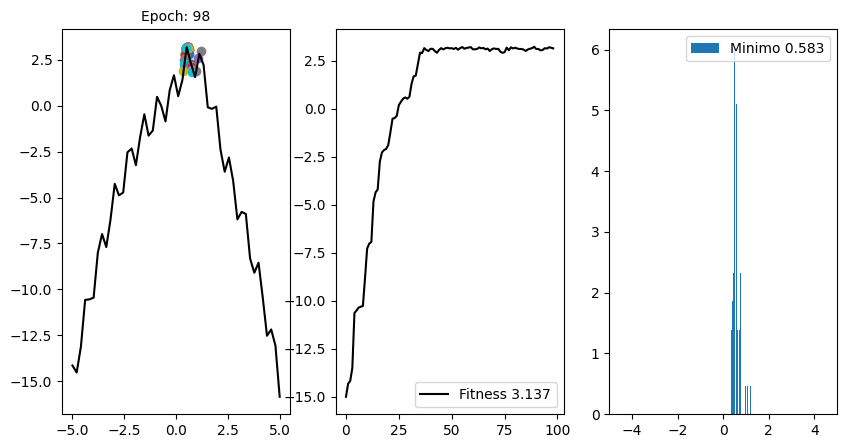

In [181]:
Robots = GetRobots(50)
Robots = Genetic(Robots, Plot=True)

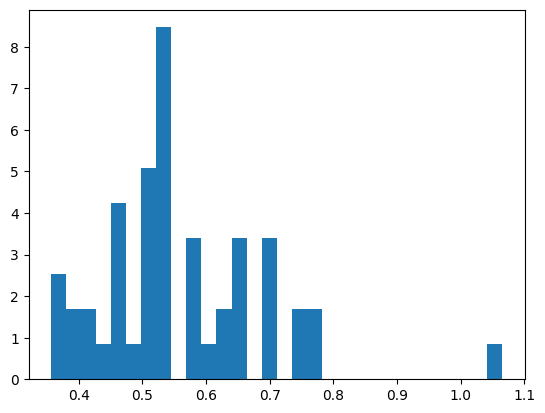

In [182]:
ll = []
for i, p in enumerate(Robots):
  ll.append(p.GetR())
_ = plt.hist(ll,bins=30,density=True)

In [169]:
np.mean(ll)

np.float64(0.5436029452703326)